<a href="https://colab.research.google.com/github/Duckie2369/MNIST-Digits-Classification-on-FPGA/blob/main/MNIST_Digits_Classification_(Based_Simple_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Device Configuration

In [69]:
import torch
# Device configuration
device = torch.device('cpu')
device

device(type='cpu')

# Import Dataset

In [70]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [71]:
print(train_data)
print(test_data)
print(train_data.data.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


Sample data

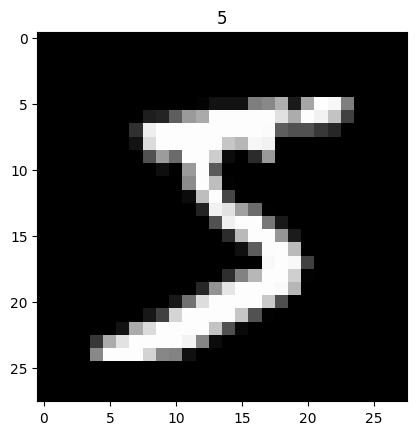

In [72]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

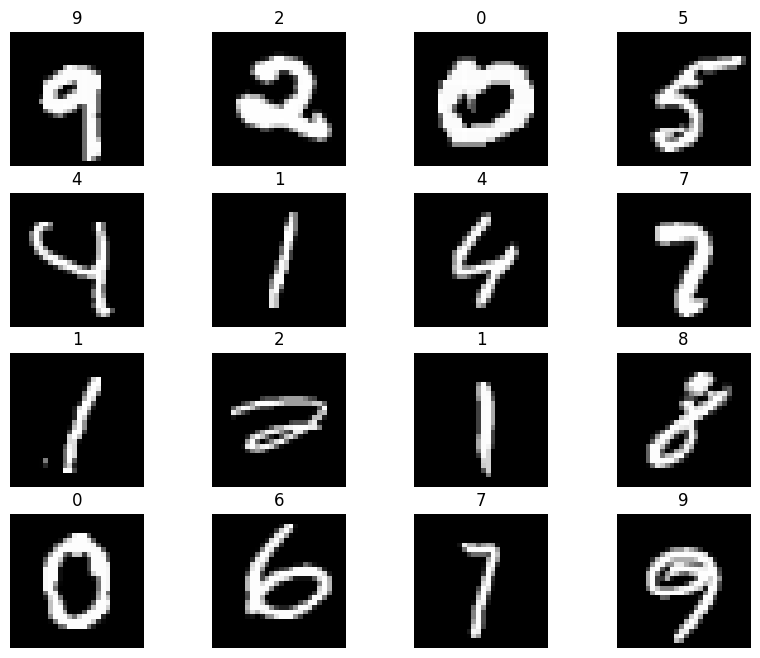

In [73]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Load data preparing to train

In [74]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=600, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=600, shuffle=True)

# Logical Structure

In [75]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=2,
                kernel_size=5,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(2, 3, 3, 1, 0),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # Fully connected layer, output 10 classes
        self.out = nn.Linear(3 * 5 * 5, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

In [76]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(2, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=75, out_features=10, bias=True)
)


Cross Entropy Loss Function

In [77]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

# Optimize data

In [78]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

# Train model

In [79]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train model
    total_step =  len(train_dataloader)
    for epoch in range(num_epochs):
         for i, (images, labels) in enumerate(train_dataloader):
             # Give batch data, normalize x when iterate train_loader
             b_x = Variable(images)   # batch x
             b_y = Variable(labels)   # batch y
             output = cnn(b_x)[0]
             loss = loss_func(output, b_y)
             # clear gradients for this training step
             optimizer.zero_grad()

             # backpropagation, compute gradients
             loss.backward()
             # apply gradients
             optimizer.step()

             if (i+1) % 100 == 0:
                 print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                        .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                 # pass
          # pass
      # pass
train(num_epochs, cnn, train_dataloader)

Epoch [1/10], Step [100/100], Loss: 0.2163
Epoch [2/10], Step [100/100], Loss: 0.1585
Epoch [3/10], Step [100/100], Loss: 0.0964
Epoch [4/10], Step [100/100], Loss: 0.0865
Epoch [5/10], Step [100/100], Loss: 0.1841
Epoch [6/10], Step [100/100], Loss: 0.1079
Epoch [7/10], Step [100/100], Loss: 0.0934
Epoch [8/10], Step [100/100], Loss: 0.0679
Epoch [9/10], Step [100/100], Loss: 0.0790
Epoch [10/10], Step [100/100], Loss: 0.0862


# Verifying model

In [80]:
def test():
  # Test the model
  cnn.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for i, (images, labels) in enumerate(test_dataloader):
          test_output, last_layer = cnn(images)
          pred_y = torch.max(test_output, 1)[1].data.squeeze()
          accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
          pass
          print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
          pass
test()

Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.96
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.97
Test Accuracy of the model on the 10000 test images: 0.98
Test Accuracy of the model on the 10000 test images: 0.98


Sample test

In [81]:
sample = next(iter(test_dataloader))
imgs, lbls = sample

In [82]:
actual_number = lbls[:1].numpy()
actual_number

array([9])

In [83]:
test_output, last_layer = cnn(imgs[:1])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction Number: {pred_y}')
print(f'Actual Number: {actual_number}')

Prediction Number: 9
Actual Number: [9]


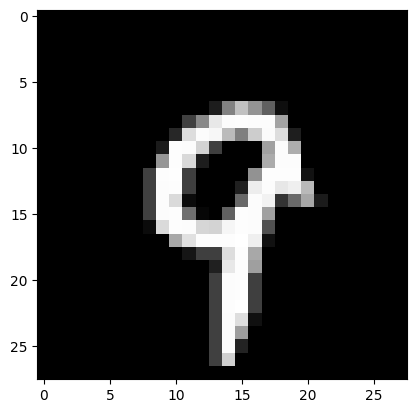

In [84]:
img = imgs[:1]
plt.imshow(img.squeeze(), cmap='gray')

In [85]:
torch.save(cnn.state_dict(), './simplebasedcnn')

In [86]:
model = CNN()
model.load_state_dict(torch.load('./simplebasedcnn'))
model.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(2, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=75, out_features=10, bias=True)
)

Model State

In [87]:
print('Model state_dict:')
for param_tensor in cnn.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print('Parameters')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, "\n", param.data)

Model state_dict:
conv1.0.weight 	 torch.Size([2, 1, 5, 5])
conv1.0.bias 	 torch.Size([2])
conv2.0.weight 	 torch.Size([3, 2, 3, 3])
conv2.0.bias 	 torch.Size([3])
out.weight 	 torch.Size([10, 75])
out.bias 	 torch.Size([10])
Parameters
conv1.0.weight 
 tensor([[[[ 0.1027, -0.1600, -0.1231, -0.0204,  0.1641],
          [ 0.1342,  0.4724,  0.7942,  0.4118,  0.1202],
          [ 0.2299,  0.5250,  0.6427,  0.3914,  0.5267],
          [ 0.0911,  0.0792, -0.0830,  0.3659,  0.5461],
          [-0.0836,  0.1277,  0.2579,  0.2825,  0.4228]]],


        [[[ 0.4518,  0.1350, -0.0849,  0.2220,  0.9772],
          [ 0.6005,  0.5837,  0.6235,  0.5671,  0.0920],
          [ 0.2693,  0.8749,  1.1374,  0.4500,  0.0737],
          [-1.1765, -0.9229, -1.0997, -0.6078, -0.0682],
          [-0.4302, -0.8660, -0.5325, -0.0360,  0.0271]]]])
conv1.0.bias 
 tensor([-0.0329,  0.0210])
conv2.0.weight 
 tensor([[[[ 0.2220, -0.5584, -0.5548],
          [-0.2858, -0.6273,  0.3947],
          [-0.3715, -0.1783,  0.